### Long Straddle Strats

In this <a href="https://www.python.org/doc/essays/blurb/">Python</a> notebook, we will dive into options hedging strategies named as Straddle strategies.  

A **straddle** is an options strategy used when an investor believes that a stock price will move significantly but is unsure about the direction of the price change. This strategy relies on the **volatility** of the stock price rather than the direction of the price movements.  
  
There are two types of straddle strategies:  

1. **Long Straddle**  
2. **Short Straddle**  

#### 1. Long Straddle  

A **long straddle** strategy involves buying both a call option and a put option for the same underlying asset, with the same strike price $K$ and expiration date $T$.  

$$
\text{Long Straddle} = C(S_t, t; K, T) + P(S_t, t; K, T)
$$  

Where:  
- $C(S_t, t; K, T)$: The price of the call option at time $t$.  
- $P(S_t, t; K, T)$: The price of the put option at time $t$.  
- $S_t$: The underlying stock price at time $t$.  
- $K$: The strike price of the options.  
- $T$: The expiration date of the options.  

This strategy profits if the stock price moves significantly in either direction, as one of the options (call or put) will increase in value to offset the cost of both options.  


#### 2. Short Straddle  

A **short straddle** strategy involves selling both a call option and a put option for the same underlying asset, with the same strike price $K$ and expiration date $T$.  


$$
\text{Short Straddle} = -C(S_t, t; K, T) - P(S_t, t; K, T)
$$  

Where:  
- $-C(S_t, t; K, T)$: Selling a call option at time $t$.  
- $-P(S_t, t; K, T)$: Selling a put option at time $t$.  
- $S_t$: The underlying stock price at time $t$.  
- $K$: The strike price of the options.  
- $T$: The expiration date of the options.  

This strategy profits when the stock price remains relatively stable, as the premiums received for selling the options offset the limited movement in the stock price.  

To do so, we have to generate multiple scenarios of the underlying asset since its evolution is completely random . To generate such underlying monte_carlo simulations, we will use practical functions of the <a href="https://finance.math.upmc.fr/en/enseignements/1_2_probas_numeriques/">Numerical Probability</a> course from the master's degree <a href="https://finance.math.upmc.fr/en/">M2 Probabilités et Finance</a> taught by both <a href="https://www.lpsm.paris/users/pages/index">Gilles Pagès</a> and <a href="https://perso.lpsm.paris/~vlemaire/site.html">Vincent Lemaire</a> . With their practical hands-on notebooks, we can easily see and plot various scenarios of underlying asset . 

Hence, we import a library called `ncxs99_pricers` where we can find all our Black & Scholes Pricers and `ncxs99_utilities` where we can find all the functions for underlying asset scenarios simulations from the M2 Probability and Finance notebooks and more. We will not provide these functions directly but you can easily implement them to well understand what's going on behind the scenes 😉.

In [1]:
from ncxs99_pricers import EuropeanOptions
from ncxs99_utilities import black_scholes_1d

We then provide all the necessary parameters the function `black_scholes_1d` which displays all the underlying asset scenarios. Here is the <a href="https://www.geeksforgeeks.org/python-docstrings/">docstring</a> of the function : 

The Black and Scholes Process is defined by the following <a href="https://ethz.ch/content/dam/ethz/special-interest/mavt/dynamic-systems-n-control/idsc-dam/Lectures/Stochastic-Systems/SDE.pdf">Stochastic Differential Equation</a>

Let $S_t$ be the solution of the SDE on $[0,T]$
$$
    \operatorname{d}\!S_t = r S_t \operatorname{d}\!t + \sigma S_t \operatorname{d}\!B_t, \quad S_0 = x
$$
Then $S_t$ is given by : 
$$
    S_t = x \exp \bigl((r- \sigma^2/2) t + \sigma B_t \bigr)
$$


`black_scholes_1d` : Simulate paths of Black-Scholes process
-    Args:
       - n_times: Number of timesteps
       - n_paths: Number of paths 
       - final_time: Final time of simulation
       - init_value: `S0`
       - r: Interest rate
       - sigma: Volatility
       - random_state: `np.random.Generator` used for simulation
-    Returns:
       - `np.array` of shape `(n_times+1, n_paths)` containing the paths 
       
We then define the function parameters and plot our results to see what happens .

In [2]:
N = 5 
M = 500
S0 = 100
r, sigma = 0.1, 0.2
D = 0 
T = 1 
K = 130
St = black_scholes_1d(N, M, init_value=S0, r=r, sigma=sigma) # Paths of BS Process

In [3]:
St[:10] # display the first 10 element of the underlying asset array 

array([[100.        , 100.        , 100.        , ..., 100.        ,
        100.        , 100.        ],
       [109.08132562,  89.78189824,  94.10895729, ...,  96.72797225,
         95.51449537,  98.76838608],
       [111.14944506,  90.88142056, 105.56572535, ..., 109.71816382,
        105.84772337, 103.87516683],
       [119.07011143,  95.66252208, 101.87981032, ..., 115.36777974,
         86.97429795, 102.51907941],
       [134.36228181,  99.72351795,  97.58341386, ..., 122.78013727,
         81.09334659, 112.64534713],
       [135.87170584, 100.21613077,  92.23103422, ..., 132.92184478,
         80.76006388, 121.53778679]])

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
sns.set_theme()

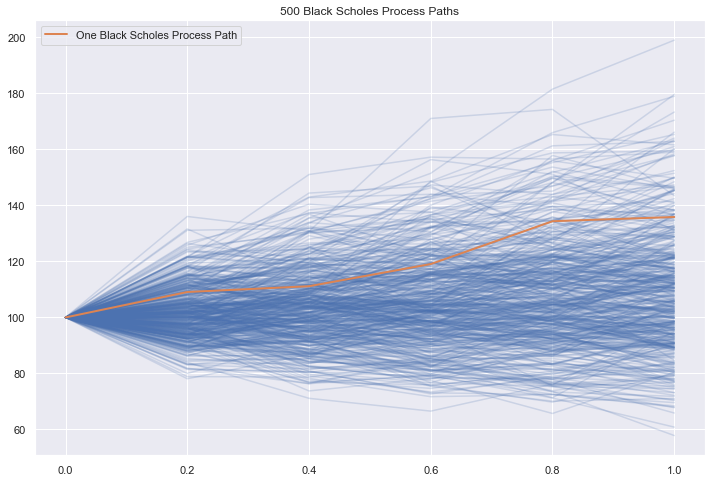

In [5]:
plt.figure(figsize=(12,8))
times = np.arange(N+1)*(T / N)
for S in St.T:
    sns.lineplot(x=times, y=S, color='C0', alpha=0.2)
ax = sns.lineplot(x=times, y=St[:,0], color='C1', lw=2, label='One Black Scholes Process Path')
ax.set(title=f"{M} Black Scholes Process Paths");

We can see in the preceding graph, 500 simulations of Black and Scholes Process. 

The next step is to store the last maturity time values of the BS process that is : Values of $S_t$ for which $t=T$ which is $1$ in our case . Why ? Because, we want to represent the <a href="https://www.math.fsu.edu/~paris/FMexam/DM%20Module%201.pdf">Payoff</a> of covered options strats and because the payoff is generally computed at the maturity for <a href="https://www.schwab.com/options/what-is-trading-options">options</a> . 

In [6]:
stock_prices = St.T[:,-1]  # We store the last values at the maturity T of our stock_prices vector 

We then <a href="https://www.geeksforgeeks.org/introduction-to-sorting-algorithm/">sort</a> our stock_prices vector in order to well represent the payoff since our simulations are purely random. To sort our vector, we used <a href="https://numpy.org/doc/stable/reference/generated/numpy.sort.html">`np.sort`</a> which has <a href="https://blog.finxter.com/how-to-sort-in-one-line/#:~:text=The%20runtime%20complexity%20of%20the,log(n))%20on%20average.">nlog(n)</a> complexity which the most efficient algorithm to sort tables in modern programming languages .

In [7]:
stock_prices = np.sort(stock_prices) # sort our stock_prices

### Long Straddle


A **long straddle** strategy involves buying both a call option and a put option for the same underlying asset, with the same strike price $K$ and expiration date $T$.  

The value of the strategy at time $t$ is given by : 

$$
\Pi_t = C(S_t, t; K, T) + P(S_t, t; K, T)
$$ 

The payoff of this strategy at time $T$ is:
$$
\Psi(S_T) = C(S_T, T; K, T) + P(S_T, T; K, T) = \max(S_T - K, 0) + \max(K - S_T, 0)= 
\begin{cases} 
K - S_T & \text{if } S_T \leq K \\
S_T - K & \text{if }  S_T > K
\end{cases}
$$


The profit of this strategy is given by :

$$
\Gamma(S_T) = \Psi(S_T) - \Pi_t= C(S_T, T; K, T) + P(S_T, T; K, T) - C(S_t, t; K, t) - P(S_t, t; K, t)= 
\begin{cases} 
K - S_T - C(S_t, t; K, T) - P(S_t,t; K, T) & \text{if } S_T \leq K \\
S_T - K - C(S_t, t; K, T) - P(S_t,t; K, T) & \text{if } S_T > K
\end{cases}
$$


Before plotting the Profit diagram of the long straddle strategy, we have to compute the option premiums . Thanks to our `EuropeanOptions` class we implemented in previous notebook you can find on my github <a href="https://github.com/Ncxs99/Financial-Mathematics/blob/master/Equity%20Derivatives%20Pricing/European%20Options/Europea_Options.ipynb">Ncxs99</a> . We then use our class to directly find the premiums of the corresponding options .

In [8]:
call_premium = EuropeanOptions(S0,K,T,sigma,r,D)
call_premium = call_premium.Call_Black_Scholes()
call_premium

2.5460171989143916

In [9]:
put_premium = EuropeanOptions(S0,K,T,sigma,r,D)
put_premium = put_premium.Put_Black_Scholes()
put_premium

20.174881543589137

After compute the option prices , then here is how we proceed to display the payoff and the profit of the long straddle strategy : 

- compute `long_call_payoff` : maximum(`stock_prices` - `K`, 0)

- compute `long_put_payoff` : maximum(`K` - `stock_prices`, 0)

- compute `long_straddle_payoff` : `long_call_payoff` + `long_put_payoff`

- Compute `long_call_profit` which is in fact the profit the investor can make only the first call option .  
`long_call_profit` = `long_call_payoff` - `call_premium` 

- Compute the `long_put_profit` which is in fact the profit earn only on the put option . `long_put_profit` = `long_put_payoff` - `put_premium`

- Compute the `Long_straddle_profit`. 
`Long_straddle_profit` = `Long_call_profit` + `Long_put_profit`

In [10]:
long_call_payoff = np.maximum(stock_prices - K, 0)
long_put_payoff = np.maximum(K - stock_prices, 0)
long_straddle_payoff = long_call_payoff + long_put_payoff
long_call_profit = long_call_payoff - call_premium
long_put_profit = long_put_payoff - put_premium
long_straddle_profit = long_call_profit + long_put_profit

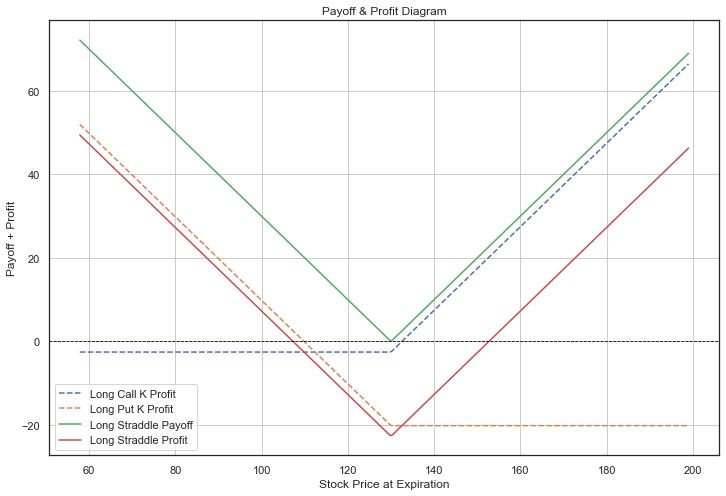

In [11]:
sns.set_theme(style='white')
plt.figure(figsize=(12, 8))
plt.plot(stock_prices, long_call_profit, label="Long Call K Profit", linestyle='--')
plt.plot(stock_prices, long_put_profit, label="Long Put K Profit", linestyle='--')
plt.plot(stock_prices, long_straddle_payoff, label="Long Straddle Payoff")
plt.plot(stock_prices, long_straddle_profit, label="Long Straddle Profit")
plt.axhline(0, color='black', linewidth=0.8, linestyle="--")
plt.title("Payoff & Profit Diagram")
plt.xlabel("Stock Price at Expiration")
plt.ylabel("Payoff + Profit")
plt.legend()
plt.grid()
plt.show()

### Long Straddle Greeks 

It is a common asked question in quantitative finance interviews . We will compute ourselves greeks of the long straddle and thanks again to our `EuropeanOptions` class we implemented in previous notebook you can find on my github <a href="https://github.com/Ncxs99/Financial-Mathematics/blob/master/Equity%20Derivatives%20Pricing/European%20Options/Europea_Options.ipynb">Ncxs99</a> .

For illustrative purposes only, we will use the values of our stock at maturity $T$. And then we will plot all the common greeks of the long straddle .

In [12]:
delta_call = EuropeanOptions(stock_prices, K, T, sigma, r, D)
delta_call = delta_call.Delta_Call()

delta_put = EuropeanOptions(stock_prices, K, T, sigma, r, D)
delta_put = delta_put.Delta_Put()

delta_long_straddle = delta_call + delta_put

In [13]:
gamma_call = EuropeanOptions(stock_prices, K, T, sigma, r, D)
gamma_call = gamma_call.Gamma_Call()

gamma_put = EuropeanOptions(stock_prices, K, T, sigma, r, D)
gamma_put = gamma_put.Gamma_Put()

gamma_long_straddle = gamma_call + gamma_put

In [14]:
vega_call = EuropeanOptions(stock_prices, K, T, sigma, r, D)
vega_call = vega_call.Vega_Call()

vega_put = EuropeanOptions(stock_prices, K, T, sigma, r, D)
vega_put = vega_put.Vega_Put()

vega_long_straddle = vega_call + vega_put

In [15]:
theta_call = EuropeanOptions(stock_prices, K, T, sigma, r, D)
theta_call = theta_call.Theta_Call()

theta_put = EuropeanOptions(stock_prices, K, T, sigma, r, D)
theta_put = theta_put.Theta_Put()

theta_long_straddle = theta_call + theta_put

We then plot the greeks of the long straddle

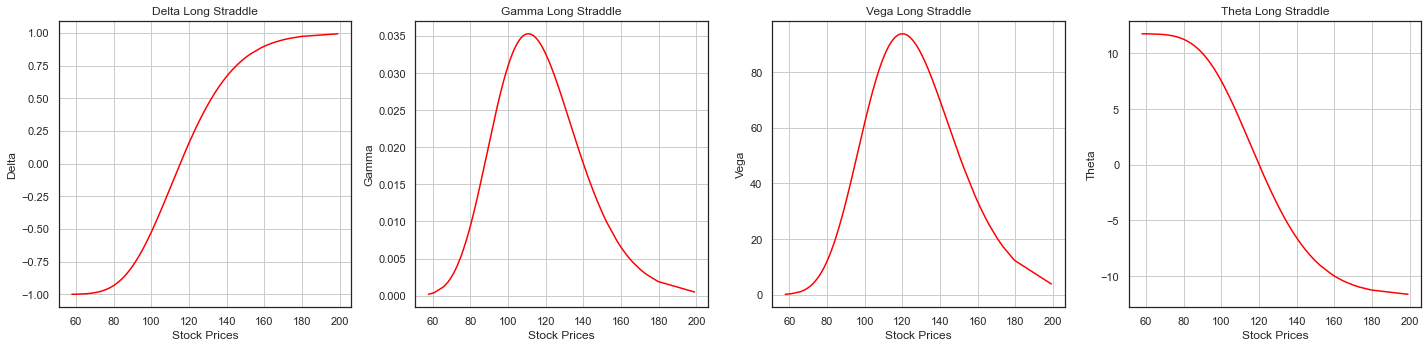

In [16]:
# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True)

# Delta Long Straddle
axes[0].plot(stock_prices, delta_long_straddle, c='red')
axes[0].set_title('Delta Long Straddle')
axes[0].set_xlabel('Stock Prices')
axes[0].set_ylabel('Delta')
axes[0].grid()

# Gamma Long Straddle
axes[1].plot(stock_prices, gamma_long_straddle, c='red')
axes[1].set_title('Gamma Long Straddle')
axes[1].set_xlabel('Stock Prices')
axes[1].set_ylabel('Gamma')
axes[1].grid()

# Vega Long Straddle
axes[2].plot(stock_prices, vega_long_straddle, c='red')
axes[2].set_title('Vega Long Straddle')
axes[2].set_xlabel('Stock Prices')
axes[2].set_ylabel('Vega')
axes[2].grid()

# Theta Long Straddle
axes[3].plot(stock_prices, theta_long_straddle, c='red')
axes[3].set_title('Theta Long Straddle')
axes[3].set_xlabel('Stock Prices')
axes[3].set_ylabel('Theta')
axes[3].grid()

# Adjust layout
plt.tight_layout()
plt.show()